# Data Visualization Notebook

## Objectives

*   Answer business requirement 1: 
    *  A study to visually differentiate a cherry leaf that is healthy from one that contains powdery mildew


## Inputs

* inputs/mildew_dataset/cherry-leaves/train
* inputs/mildew_dataset/cherry-leaves/test
* inputs/mildew_dataset/cherry-leaves/validation

## Outputs

* Image shape embeddings pickle file.
* Mean and variability of images per label plot.
* Plot to distinguish the contrast between parasite-contained and uninfected cell images.
* Generate code that can be used to build an image montage on the Streamlit dashboard.


## Additional Comments | Insights | Conclusions


---

# Set Data Directory

---

## Import libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set working directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/pp5-mildew-detection')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/pp5-mildew-detection'

## Set input directories

Set train, validation and test paths.

In [5]:
my_data_dir = 'inputs/mildew_dataset/cherry-leaves'
train_path = my_data_dir + '/train'
val_path = my_data_dir + '/validation'
test_path = my_data_dir + '/test'

## Set output directory


In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('A prior version is in place; proceed with making a new version.')
    pass
else:
    os.makedirs(name=file_path)

A prior version is in place; proceed with making a new version.


### Set label names

In [7]:
labels = os.listdir(train_path)
print('The following are labels for the images:', labels)

The following are labels for the images: ['healthy', 'powdery_mildew']


---

# Visual representation of image data

---

## Image shape 

Compute average images size on train set.

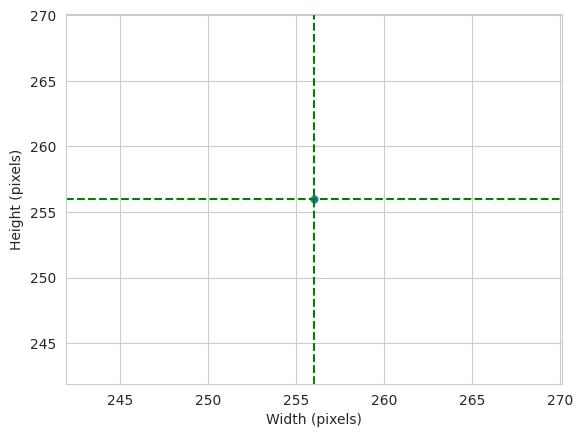

Mean width of images: 256 
Mean height of images: 256


In [8]:
dim1, dim2 = [], []
for label in labels:
    for image_filename in os.listdir(train_path + '/' + label):
        img = imread(train_path + '/' + label + '/' + image_filename)
        height1, with2, colors = img.shape
        dim1.append(height1)  
        dim2.append(with2)  

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim1_mean, color='g', linestyle='--')
axes.axhline(y=dim2_mean, color='g', linestyle='--')
plt.show()
print(f"Mean width of images: {dim2_mean} \nMean height of images: {dim1_mean}")

The training images are resized to the average dimensions of all images in the train set.

In [9]:
image_shape = (dim1_mean, dim2_mean, 3)
image_shape

(256, 256, 3)

Save the image shape embeddings

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']

---

## Mean and variability of images  per label

### Function to load images in an array (tensor)